---
# The perceptron

---

### Perceptron Algorithm Introduction

The perceptron is a basic function that mimics the human neuron. It receives  n  inputs, associated to the dendrites inputs to the neuron. Each dendrite, due to lernging, is weighted by a number that signals its input relevance for the neuron.

<img src="Complete_neuron_cell_diagram_en.svg" width="600"/>

#### How Perceptron Model Works?

- Perceptron Network is an artificial neuron with "hardlim" as a transfer function. It is mainly used as a binary classifier. Here, our goal is to classify the input into the binary classifier and for that network has to "LEARN" how to do that. "LEARN" means the model has to be trained to do so.

- For training, the network is provided with a bunch of inputs with already known outputs. As result is already known, the output of a network is compared with the already known results and with the help of the "Perceptron Learning Rules" model get trained.

There are 2 functions in the perceptron network:

- Summation function
- The transfer function (Hardlim in our case)
A bunch of inputs is provided to the network. Each neuron in the network has a weight associated with it. At the beginning Perceptron is a dense layer. This means Every input will pass through each neuron(Summation Function which will be pass through activation function) and will classify.

We can summarize an artificial neuron with the following mathematical expression:
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right)
$$

<img src="perceptron_math.png" width="600"/>

## Task
In this project, I will build a perceptron model from scratch and implement the perceptron learning algorithm for binary species classification.

Our task will be to classify y labels with 0 and 1 using two features X0 and X1. In order to do this we will need the following libraries:
- [matplotlib] (https://matplotlib.org/)
- [pandas] (https://pandas.pydata.org/)
- [numpy] (https://numpy.org/)
- [seaborn] (https://seaborn.pydata.org/)
- [scikit-learn] (https://scikit-learn.org/)
...

In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


### Create Random data

In [100]:
def generate_dataset(size, classes=2, noise=0.5):
    # Generate random datapoints
    labels = np.random.randint(0, classes, size)
    x = (np.random.rand(size) + labels) / classes
    y = x + np.random.rand(size) * noise
    # Reshape data in order to merge them
    x = x.reshape(size, 1)
    y = y.reshape(size, 1)
    labels = labels.reshape(size, 1)
    # Merge the data
    data = np.hstack((x, y, labels))
    return data

In [101]:
data = generate_dataset (400,classes=2, noise=0.5)

In [102]:
# define X and y
X= data[:,0:2]
y= data[:,2]

In [104]:
y.dtype

dtype('float64')

In [105]:
# change y datatype from float to int
y=y.astype(np.int)

In [138]:
# set colors for different labels
colors = ['steelblue' if label == 0 else 'darkorange' for label in y]

### Visualisation of the data

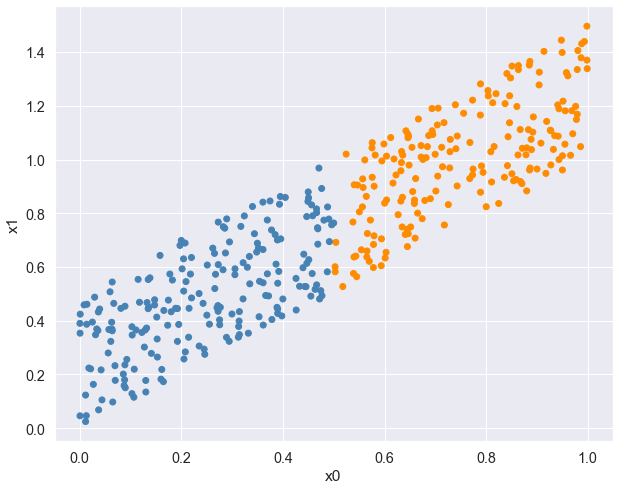

In [139]:
# Create visualisation of data
plt.figure (figsize=(10,8))
plt.scatter (X[:,0], X[:,1], c= colors)
plt.xlabel ('x0')
plt.ylabel ('x1')
plt.show ()

### Train-Test Split Data

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)

### Define main function

In [114]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

### Training the model

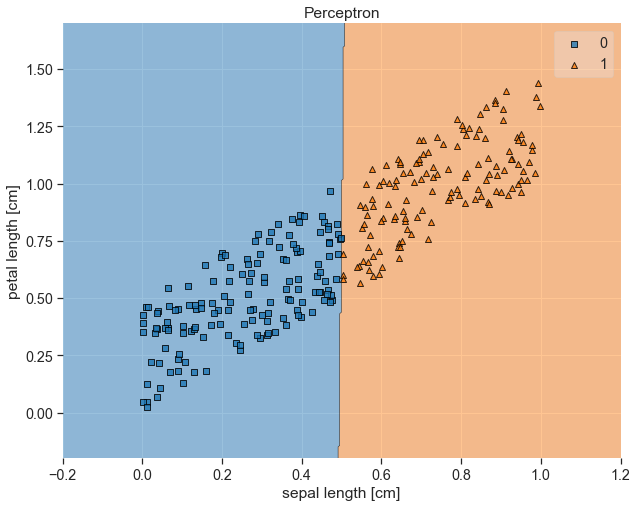

In [144]:
ppn = Perceptron(learning_rate=0.01, n_iters=100)

ppn.fit(X_train, y_train)

plt.figure (figsize=(10,8))

plot_decision_regions(X_train, y_train, clf=ppn)
plt.gca().set(xlim=(-0.2, 1.2), ylim=(-0.2, 1.7) )
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()



In [124]:
print('Weights: %s' % ppn.weights)
print('bias: %s' % ppn.bias)

Weights: [ 0.14158864 -0.00101309]
bias: -0.07


### Predictions and Evaluation

In [116]:
y_pred= ppn.predict (X_test)

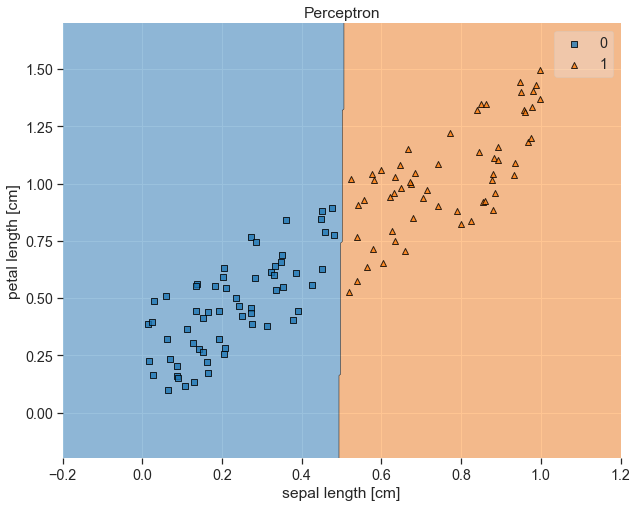

In [148]:
ppn = Perceptron(learning_rate=0.01, n_iters=100)

ppn.fit(X_train, y_train)

plt.figure (figsize=(10,8))

plot_decision_regions(X_test, y_pred, clf=ppn)
plt.gca().set(xlim=(-0.2, 1.2), ylim=(-0.2, 1.7) )
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()



In [112]:
# import metrics from sklearn
from sklearn import metrics
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_ppn = pd.DataFrame (confusion_matrix)

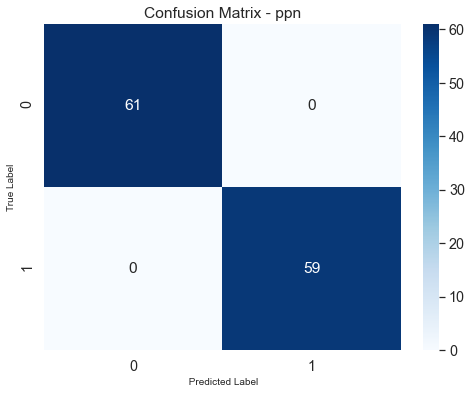

In [147]:
plt.figure (figsize =(8,6))

ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_ppn, 
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap=plt.cm.Blues)

ax.set_title ('Confusion Matrix - ppn')
ax.set_xlabel (' Predicted Label', fontsize =10)
#ax.set_xticklabels ()
ax.set_ylabel ('True Label', fontsize =10)
#ax.set_yticklabels (labels)
plt.show ()